In [1]:
import numpy as np
import matplotlib as mtlp
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import yaml
import math
import arviz as az
import pandas as pd
from matplotlib import rc
import pickle 
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpl_patches
######
import sys
sys.path.append('../HelpherFunctions/')
from ForestPlot import *
## ***************************************************************************
## * RC param                                                                 *
## ***************************************************************************
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'serf'
## ***************************************************************************
filename ="../results/data.yaml"
########
stream = open(filename, 'r')#
dat = yaml.safe_load(stream)
colpastil = ['#9cadce','#bb9cb1','#937eba','#f09494','#72bbd0', '#ffcaaf' ,'#ffafcc','#d3ab9e' ]

In [2]:
LambdaNP=1e+3  #GeV
v= 246.
mh=125.1
def CHtokl(CH):
    return 1-2.0*CH*v**4/mh**2/LambdaNP**2

def kltoCH(kl):
    return LambdaNP**2/v**4*mh**2*0.5*(1-kl)

def multimode(x, n, hdi_prob):
    """ Finds all the modes in the distribution
        arguments:
            x: the array for the distribution
            n: the identifier for the variable
    """
    md = az.hdi(x, hdi_prob=hdi_prob, multimodal=False)
    if len(md) < 2 and n > 1:
        return np.NaN
    else:
        return md[n%2]    
######

stats_func_2 = {
    'b0': lambda x: multimode(x, 0, 0.9545),
     'b1': lambda x: multimode(x, 1, 0.9545),
        }

### Plot the fit summary for $C_{Qt}^{(1)}$

Got error No model on context stack. trying to find log_likelihood in translation.


1.0331519551142685
-0.8272272044010923


Got error No model on context stack. trying to find log_likelihood in translation.


1.1826794215321181
-0.8606516418221435


Got error No model on context stack. trying to find log_likelihood in translation.


0.43255674229966945
-0.9795795103993876


Got error No model on context stack. trying to find log_likelihood in translation.


0.42997414421748226
-1.0272690943151286


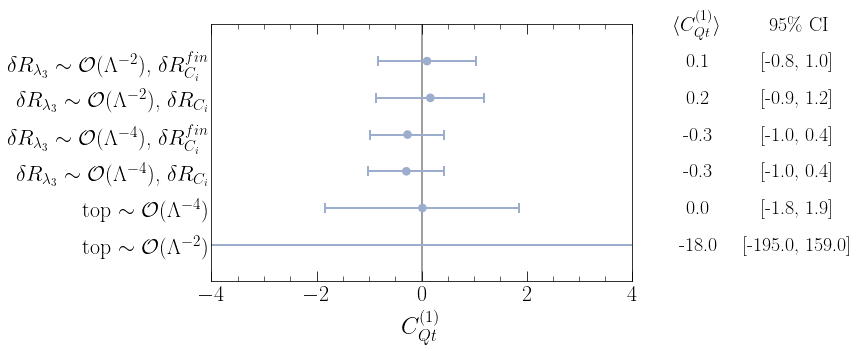

In [6]:
labs = [
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}^{fin}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}^{fin}$ ",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}$ ",
       r"top $\sim\mathcal{O}(\Lambda^{-4})$",
       r"top $\sim\mathcal{O}(\Lambda^{-2})$"]



ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)

files =[
    '../results/fits/Cq1_LHC_RunII_linearl3_fin.pickle',
        '../results/fits/Cq1_LHC_RunII_linearl3_rge.pickle',
          '../results/fits/Cq1_LHC_RunII_quadl3_fin.pickle',
          '../results/fits/Cq1_LHC_RunII_quadl3_rge.pickle',
      #  '../results/fits/Cq1_HL-LHC_linearl3_fin.pickle',
     #    '../results/fits/Cq1_HL-LHC_linearl3_rge.pickle',
       #  '../results/fits/Cq1_HL-LHC_quadl3_fin.pickle',
     #   '../results/fits/Cq1_HL-LHC_quadl3_rge.pickle'
        ]
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        print(df_2.loc['C4Q']['hdi_97.725%'])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
        print(df_2.loc['C4Q']['hdi_2.275%'])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=len(files)    
ymu=np.insert(ymu,r,0.0-0.5*(1.830-1.862))
yup=np.insert(yup,r,1.862)
ydown=np.insert(ydown,r,-1.830)
    ##
ymu=np.insert(ymu,r+1,0.0-0.5*(195-159))
yup=np.insert(yup,r+1,159)
ydown=np.insert(ydown,r+1,-195)
    #
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{Qt}^{(1)} \rangle$',)
errcol=[colpastil[0] for i in range(len(labs))]
p.colors(errorbarcolor=errcol,pointcolor=colpastil[0])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=4, min_value=-4,decimal=1)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{Qt}^{(1)}$", fontsize=24)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqt1.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

### $C_{Qt}^{(8)}$

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


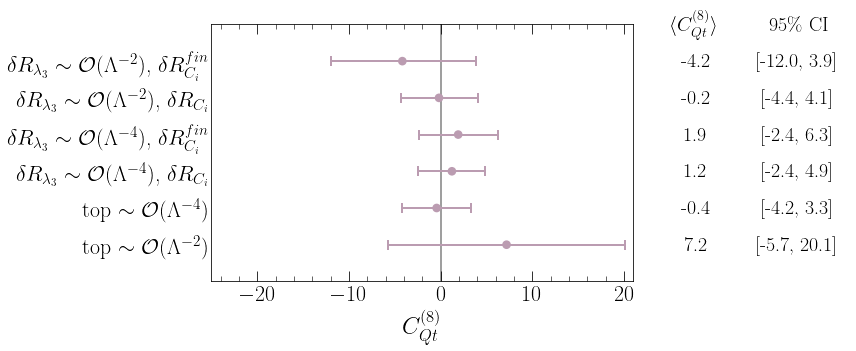

In [7]:
labs = [
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}^{fin}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}^{fin}$ ",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}$ ",
       r"top $\sim\mathcal{O}(\Lambda^{-4})$",
       r"top $\sim\mathcal{O}(\Lambda^{-2})$"]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)

files =[
    '../results/fits/Cq8_LHC_RunII_linearl3_fin.pickle',
        '../results/fits/Cq8_LHC_RunII_linearl3_rge.pickle',
          '../results/fits/Cq8_LHC_RunII_quadl3_fin.pickle',
          '../results/fits/Cq8_LHC_RunII_quadl3_rge.pickle'
      #  '../results/fits/Cq8_HL-LHC_linearl3_fin.pickle',
     #    '../results/fits/Cq8_HL-LHC_linearl3_rge.pickle',
       #  '../results/fits/Cq8_HL-LHC_quadl3_fin.pickle',
      #  '../results/fits/Cq8_HL-LHC_quadl3_rge.pickle'
        ]
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 =  pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=len(files)    
ymu=np.insert(ymu,r,0.0-0.5*(4.213-3.346))
yup=np.insert(yup,r,3.346)
ydown=np.insert(ydown,r,-4.213)
    ##
ymu=np.insert(ymu,r+1,0.0-0.5*(5.722-20.105))
yup=np.insert(yup,r+1,20.105)
ydown=np.insert(ydown,r+1,-5.722)
    #
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{Qt}^{(8)} \rangle$')
errcol=[colpastil[1] for i in range(len(labs))]
p.colors(errorbarcolor=errcol,pointcolor=colpastil[1])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=21, min_value=-25,decimal=1)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{Qt}^{(8)}$", fontsize=24)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqt8.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

### $C_{QtQb}^{(1)} $

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


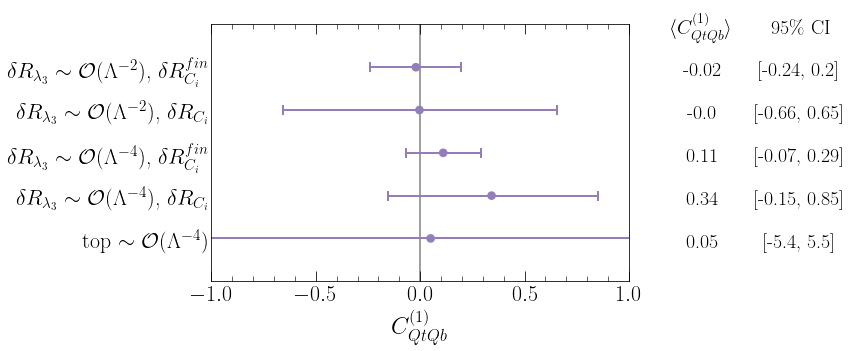

In [8]:
labs = [
                 r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}^{fin}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}^{fin}$ ",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}$ ",
       r"top $\sim\mathcal{O}(\Lambda^{-4})$"]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)

files =[
    '../results/fits/Cqtqb1_LHC_RunII_linearl3_fin.pickle',
        '../results/fits/Cqtqb1_LHC_RunII_linearl3_rge.pickle',
          '../results/fits/Cqtqb1_LHC_RunII_quadl3_fin.pickle',
          '../results/fits/Cqtqb1_LHC_RunII_quadl3_rge.pickle'
      #  '../results/fits/Cqtqb1_HL-LHC_linearl3_fin.pickle',
     #    '../results/fits/Cqtqb1_HL-LHC_linearl3_rge.pickle',
       #  '../results/fits/Cqtqb1_HL-LHC_quadl3_fin.pickle',
      #  '../results/fits/Cqtqb1_HL-LHC_quadl3_rge.pickle'
        ]
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=len(files)   
ymu=np.insert(ymu,r,0.0-0.5*(5.4-5.5))
yup=np.insert(yup,r,5.5)
ydown=np.insert(ydown,r,-5.4)
    #
#ymu=np.insert(ymu,r+1,0.0-0.5*(4.8-4.9))
#yup=np.insert(yup,r+1,4.9)
#ydown=np.insert(ydown,r+1,-4.8)        
    #
errcol=[colpastil[2] for i in range(len(labs))]
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{QtQb}^{(1)} \rangle$')
p.colors(errorbarcolor=errcol,pointcolor=colpastil[2])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=1, min_value=-1,decimal=2)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{QtQb}^{(1)}$ ", fontsize=24)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqtqb1.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

### $C_{QtQb}^{8}$

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


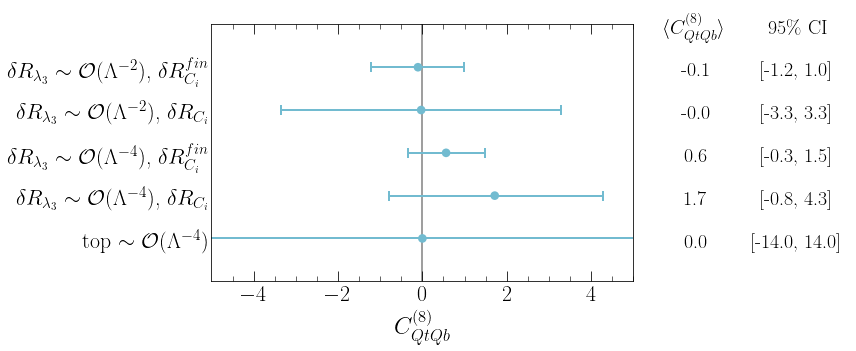

In [9]:
labs = [
               r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}^{fin}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$, $\delta R_{C_i}$",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}^{fin}$ ",
         r" $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$, $\delta R_{C_i}$ ",
       r"top $\sim\mathcal{O}(\Lambda^{-4})$"
]
ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =[
    '../results/fits/Cqtqb8_LHC_RunII_linearl3_fin.pickle',
        '../results/fits/Cqtqb8_LHC_RunII_linearl3_rge.pickle',
          '../results/fits/Cqtqb8_LHC_RunII_quadl3_fin.pickle',
          '../results/fits/Cqtqb8_LHC_RunII_quadl3_rge.pickle'
      #  '../results/fits/Cqtqb8_HL-LHC_linearl3_fin.pickle',
     #    '../results/fits/Cqtqb8_HL-LHC_linearl3_rge.pickle',
       #  '../results/fits/Cqtqb8_HL-LHC_quadl3_fin.pickle',
      #  '../results/fits/Cqtqb8_HL-LHC_quadl3_rge.pickle'
        ]
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=len(files)    
ymu=np.insert(ymu,r,0.0)
yup=np.insert(yup,r,14.0)
ydown=np.insert(ydown,r,-14)
    #
#ymu=np.insert(ymu,r+1,0.0)
#yup=np.insert(yup,r+1,13.0)
#ydown=np.insert(ydown,r+1,-13.0)        
    #
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{QtQb}^{(8)} \rangle$')
errcol=[colpastil[4] for i in range(len(labs))]
p.colors(errorbarcolor=errcol,pointcolor=colpastil[4])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=5, min_value=-5,decimal=1)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{QtQb}^{(8)}$ ", fontsize=24)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqtqb8.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

## New Wilson Coeffecients 

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


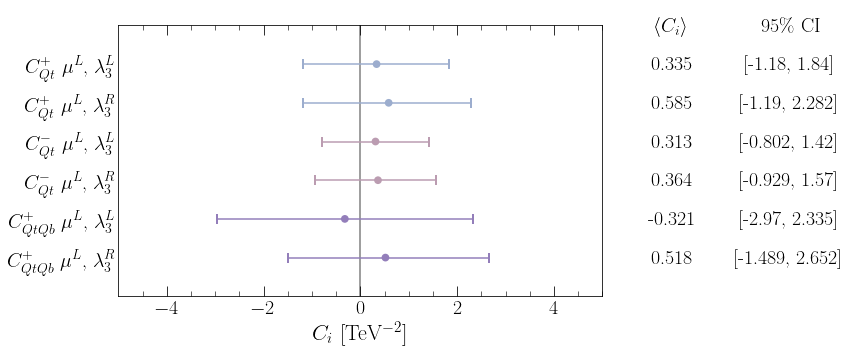

In [12]:
labs = [r"$ C_{Qt}^{+}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{Qt}^{+}\,\,\mu^L$, $\lambda_3^R$",
       r"$ C_{Qt}^{-}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{Qt}^{-}\,\,\mu^L$, $\lambda_3^R$",
       r"$ C_{QtQb}^{+}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{QtQb}^{+}\,\,\mu^L$, $\lambda_3^R$"]

    
ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =['../results/fits/CQtp.pickle',
        '../results/fits/CQtp_lambda3R.pickle',
        '../results/fits/CQtm.pickle',
        '../results/fits/CQtm_lambda3R.pickle',
        '../results/fits/CQtQbp.pickle',
        '../results/fits/CQtQbp_lambda3R.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0] 
 
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{i} \rangle$')
errcol=[colpastil[0],colpastil[0],colpastil[1],colpastil[1],colpastil[2],colpastil[2]  ]
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=5, min_value=-5)

        
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{i}$ [TeV$^{-2}$]", fontsize=22)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_neu.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


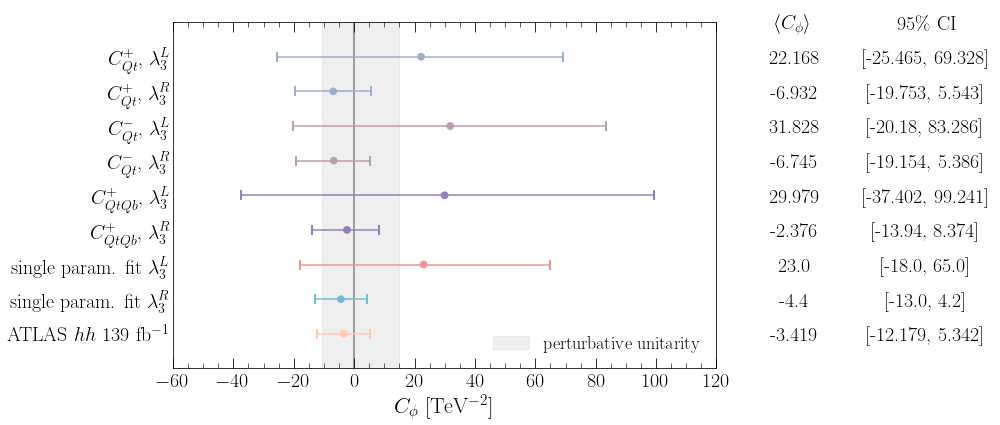

In [13]:
labs = [r"$ C_{Qt}^{+}$, $\lambda_3^L$",
        r"$C_{Qt}^{+}$, $\lambda_3^R$",
       r"$ C_{Qt}^{-}$, $\lambda_3^L$",
        r"$C_{Qt}^{-}$, $\lambda_3^R$",
       r"$ C_{QtQb}^{+}$, $\lambda_3^L$",
        r"$C_{QtQb}^{+}$, $\lambda_3^R$",
         r'single param. fit $\lambda_3^L$',
       r'single param. fit $\lambda_3^R$',
        r'ATLAS $hh$ 139 fb$^{-1}$' ]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =['../results/fits/CQtp.pickle',
        '../results/fits/CQtp_lambda3R.pickle',
        '../results/fits/CQtm.pickle',
        '../results/fits/CQtm_lambda3R.pickle',
        '../results/fits/CQtQbp.pickle',
        '../results/fits/CQtQbp_lambda3R.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['Cphi']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['Cphi']['mean']])
        ydown=np.append(ydown,[df_2.loc['Cphi']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0] 

###
r=6    
#single param fit l3 linear
ymu=np.insert(ymu,r,23)
yup=np.insert(yup,r,65)
ydown=np.insert(ydown,r,-18)
    #l3 R
ymu=np.insert(ymu,r+1,-4.4)
ydown=np.insert(ydown,r+1,-13.0)
yup=np.insert(yup,r+1,4.2)   

    # hh
ymu=np.insert(ymu,r+2,kltoCH(6.7)+0.5*(-kltoCH(6.7)+kltoCH(-1.5)))
ydown=np.insert(ydown,r+2,kltoCH(6.7))
yup=np.insert(yup,r+2,kltoCH(-1.5))  
#####    



p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{\phi} \rangle$')
errcol=[colpastil[0],colpastil[0],colpastil[1],colpastil[1],colpastil[2],colpastil[2],colpastil[3] ,colpastil[4],colpastil[5]    ]
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(14,6), t_adjuster=0.045, max_value=120, min_value=-60)

ax.axvspan(kltoCH(6.0),kltoCH(-6.0), alpha=0.12, color='gray',label=r'perturbative unitarity')        
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{\phi}$ [TeV$^{-2}$]", fontsize=22)
#ax.text(-5.,0.0,r"perturbative unitarity",fontsize=16)
ax.legend(fontsize=18,frameon=False)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_neu_cphi.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################

 ## $C_\phi$ 

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


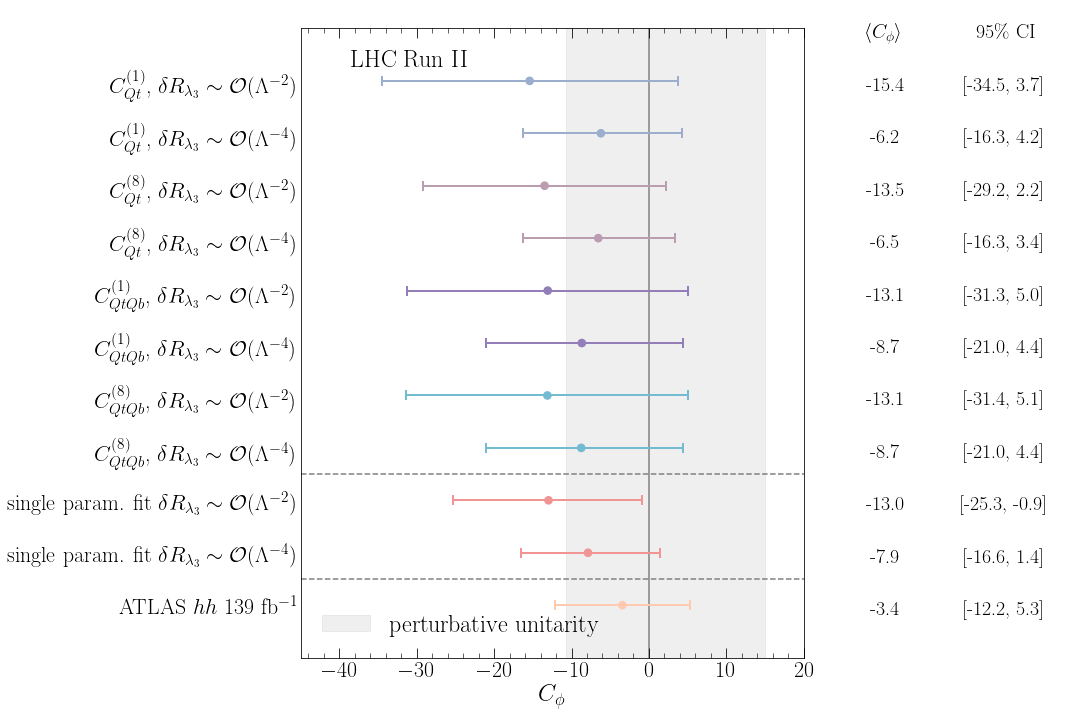

In [11]:
labs = [r"$C_{Qt}^{(1)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
        r"$C_{Qt}^{(1)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
       r"$ C_{Qt}^{(8)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
         r"$ C_{Qt}^{(8)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
       r"$ C_{QtQb}^{(1)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
        r"$ C_{QtQb}^{(1)}$,   $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
         r"$ C_{QtQb}^{(8)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
         r"$ C_{QtQb}^{(8)}$,  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
         r'single param. fit  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$',
           r'single param. fit $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$',
      #  r'ATLAS $hh$ 139 fb$^{-1}$ ($\lambda_3^L$)'
        r'ATLAS $hh$ 139 fb$^{-1}$' ]


ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =[ 
    '../results/fits/Cq1_LHC_RunII_linearl3_rge.pickle',
       '../results/fits/Cq1_LHC_RunII_quadl3_rge.pickle'
    #,
     #   '../results/fits/Cq1_HL-LHC_linearl3_rge.pickle',
      #  '../results/fits/Cq1_HL-LHC_quadl3_rge.pickle'
        ,
        '../results/fits/Cq8_LHC_RunII_linearl3_rge.pickle',
       '../results/fits/Cq8_LHC_RunII_quadl3_rge.pickle'
    #    ,
     #   '../results/fits/Cq8_HL-LHC_linearl3_rge.pickle',
      #  '../results/fits/Cq8_HL-LHC_quadl3_rge.pickle'
        ,
         '../results/fits/Cqtqb1_LHC_RunII_linearl3_rge.pickle',
       '../results/fits/Cqtqb1_LHC_RunII_quadl3_rge.pickle'
    #,
     #   '../results/fits/Cqtqb1_HL-LHC_linearl3_rge.pickle',
      #  '../results/fits/Cqtqb1_HL-LHC_quadl3_rge.pickle'
        ,
        '../results/fits/Cqtqb8_LHC_RunII_linearl3_rge.pickle',
       '../results/fits/Cqtqb8_LHC_RunII_quadl3_rge.pickle'
    #,
     #   '../results/fits/Cqtqb8_HL-LHC_linearl3_rge.pickle',
      #  '../results/fits/Cqtqb8_HL-LHC_quadl3_rge.pickle'
]
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['Cphi']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['Cphi']['mean']])
        ydown=np.append(ydown,[df_2.loc['Cphi']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0] 

###
r=8    
#single param fit l3 linear


yup=np.insert(yup,r,-0.9195899689656248)
ymu=np.insert(ymu,r,-12.975610659080223)
ydown=np.insert(ydown,r,-25.28033643205620)

##### Quadratic
yup=np.insert(yup,r+1,1.4221277147951066)
ymu=np.insert(ymu,r+1,-7.87282119205356)
ydown=np.insert(ydown,r+1,-16.568453601723128)

    #l3 Resummed
#ymu=np.insert(ymu,r+1,-5.6244568021320696)
#ydown=np.insert(ydown,r+1,-15.465410002102406)
#yup=np.insert(yup,r+1,3.548758760911256)   

    # hh linear
#ymu=np.insert(ymu,8.3)
#ydown=np.insert(ydown,r+2,-4.7)
#yup=np.insert(yup,r+2,19.2)  
#####    
    # hh quadratic
ymu=np.insert(ymu,r+2,kltoCH(6.7)+0.5*(-kltoCH(6.7)+kltoCH(-1.5)))
ydown=np.insert(ydown,r+2,kltoCH(6.7))
yup=np.insert(yup,r+2,kltoCH(-1.5))  

p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{\phi} \rangle$')
errcol=[colpastil[0],colpastil[0], #cqt1
        colpastil[1],colpastil[1], #cqt8
        colpastil[2],colpastil[2],#cqtqb1
        colpastil[4],colpastil[4],#cqtqb8
        colpastil[3] ,colpastil[3] # single
        ,colpastil[5] ]# hh
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(15,10), t_adjuster=0.035, max_value=20, min_value=-45,decimal=1)

ax.axvspan(kltoCH(6.0),kltoCH(-6.0), alpha=0.12, color='gray',label=r'perturbative unitarity')        
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{\phi}$", fontsize=24)
#ax.text(-5.,0.0,r"perturbative unitarity",fontsize=16)
ax.axhline(y=7.5, color="gray", linestyle="--")
ax.axhline(y=9.5, color="gray", linestyle="--")
ax.legend(fontsize=24,frameon=False)
ax.text(0.1,0.95,r'LHC Run II',fontsize=24, va='center', transform=ax.transAxes)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_forest_cphi_LHC_RunII.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################

No handles with labels found to put in legend.


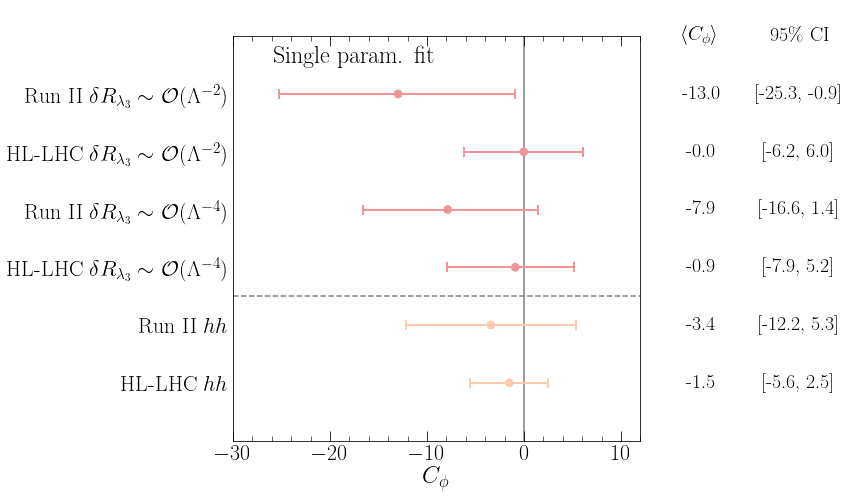

In [12]:
labs = [
    #r"$C_{Qt}^{(1)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
     #   r"$C_{Qt}^{(1)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
      # r"$ C_{Qt}^{(8)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
       #  r"$ C_{Qt}^{(8)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
       #r"$ C_{QtQb}^{(1)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
       # r"$ C_{QtQb}^{(1)}$,   $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
        # r"$ C_{QtQb}^{(8)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$",
        # r"$ C_{QtQb}^{(8)}$,  $\Sigma_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$",
         r'Run II $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$',
         r'HL-LHC $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-2})$',
           r'Run II $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$',
           r'HL-LHC  $\delta R_{\lambda_3}\sim \mathcal{O}(\Lambda^{-4})$',
         r' Run II $hh$',
        r'HL-LHC  $hh$ ' ]


ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =[ 
 #       '../results/fits/Cq1_HL-LHC_linearl3_rge.pickle',
  #    '../results/fits/Cq1_HL-LHC_quadl3_rge.pickle'
   #     ,

    #   '../results/fits/Cq8_HL-LHC_linearl3_rge.pickle',
     #  '../results/fits/Cq8_HL-LHC_quadl3_rge.pickle'
      #  ,
       # '../results/fits/Cqtqb1_HL-LHC_linearl3_rge.pickle',
        #'../results/fits/Cqtqb1_HL-LHC_quadl3_rge.pickle'
        #,

        #'./results/fits/Cqtqb8_HL-LHC_linearl3_rge.pickle',
        #'../results/fits/Cqtqb8_HL-LHC_quadl3_rge.pickle'
]
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['Cphi']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['Cphi']['mean']])
        ydown=np.append(ydown,[df_2.loc['Cphi']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0] 

###
r=len(files)
#single param fit l3 linear
#Run-II
yup=np.insert(yup,r,-0.9195899689656248)
ymu=np.insert(ymu,r,-12.975610659080223)
ydown=np.insert(ydown,r,-25.28033643205620)
#HL-LHC
yup=np.insert(yup,r+1,6.042377563588629)
ymu=np.insert(ymu,r+1,-0.026213946690112684)
ydown=np.insert(ydown,r+1,-6.187761533079018)
##### Quadratic
#Run-II
yup=np.insert(yup,r+2,1.4221277147951066)
ymu=np.insert(ymu,r+2,-7.87282119205356)
ydown=np.insert(ydown,r+2,-16.568453601723128)
#HL-LHC
yup=np.insert(yup,r+3,5.189780163470152)
ymu=np.insert(ymu,r+3,-0.9031002009102896)
ydown=np.insert(ydown,r+3,-7.932450485320636)
 
#####
#Run-II
ymu=np.insert(ymu,r+4,kltoCH(6.7)+0.5*(-kltoCH(6.7)+kltoCH(-1.5)))
ydown=np.insert(ydown,r+4,kltoCH(6.7))
yup=np.insert(yup,r+4,kltoCH(-1.5))  
# HL
ymu=np.insert(ymu,r+5,kltoCH(3.6)+0.5*(-kltoCH(3.6)+kltoCH(-.18)))
ydown=np.insert(ydown,r+5,kltoCH(3.6))
yup=np.insert(yup,r+5,kltoCH(-.18))  

p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{\phi} \rangle$')
#errcol=[colpastil[0],colpastil[0], #cqt1
 #       colpastil[1],colpastil[1], #cqt8
  #      colpastil[2],colpastil[2],#cqtqb1
   #     colpastil[4],colpastil[4],#cqtqb8
    #    colpastil[3] ,colpastil[3] # single
     #   ,colpastil[5] ]# hh

errcol=[colpastil[3] ,colpastil[3] # single
        ,colpastil[3] ,colpastil[3] # single
        ,colpastil[5],colpastil[5] ]# hh
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(12,7), t_adjuster=0.073, max_value=12, min_value=-30,decimal=1)

#ax.axvspan(kltoCH(6.0),kltoCH(-6.0), alpha=0.12, color='gray',label=r'perturbative unitarity')        
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{\phi}$", fontsize=24)
#ax.text(-5.,0.0,r"perturbative unitarity",fontsize=16)
ax.legend(fontsize=24,frameon=False,loc=3)
ax.text(0.1,0.95,r'Single param. fit',fontsize=24, va='center', transform=ax.transAxes)
ax.axhline(y=3.5, color="gray", linestyle="--")
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_forest_cphi_singleparam.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################

No handles with labels found to put in legend.


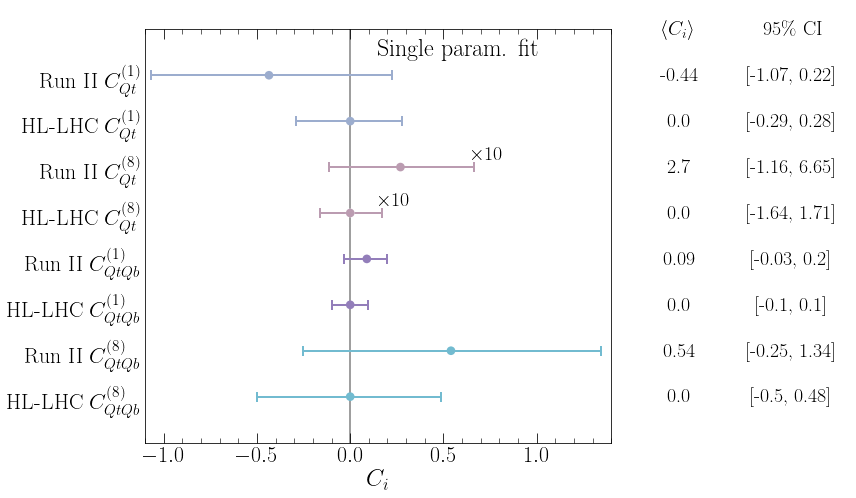

In [13]:

ymu = np.array([ -0.4358,0.0,
               2.695,0.00,
                0.08902503749,0.0,
                 0.5404959166336541, 0.0])



yup = np.array([ 0.22274,0.2783037,
               6.650603,1.7053911,
              0.199991, 0.0976883,
              1.3428903,0.48467 ])

ydown = np.array([ -1.0686,-0.290,
               -1.15900,-1.643,
               -0.0318,-0.09754654,
               -0.2535,-0.4990])


labs=[r'Run II $C_{Qt}^{(1)}$',r'HL-LHC $C_{Qt}^{(1)}$',
     r'Run II $C_{Qt}^{(8)}$',r'HL-LHC $C_{Qt}^{(8)}$',
      r'Run II $C_{QtQb}^{(1)}$',r'HL-LHC $C_{QtQb}^{(1)}$',
                 r' Run II $C_{QtQb}^{(8)}$',r'HL-LHC $C_{QtQb}^{(8)}$']

p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.,effectmeasure= r'$\langle C_{i} \rangle$')
errcol=[colpastil[0],colpastil[0], #cqt1
        'white', 'white', #cqt8
        colpastil[2],colpastil[2],#cqtqb1
        colpastil[4],colpastil[4],#cqtqb8
       ]
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(12,7), t_adjuster=0.055, max_value=1.4, min_value=-1.1,decimal=2)
ax.errorbar([2.695/10,0.0], [2,3],xerr=[[2.695/10+1.15900/10,-1.7053911/10], [6.650603/10-2.695/10,-1.643/10]], lw=0, capsize=5, capthick=2, 
                         ecolor=colpastil[1],elinewidth=2.*(3 / 3),marker='None', zorder=2)
scatter = ax.scatter([2.695/10,0.0], [2,3], c=colpastil[1], s=(3 * 25), marker='o', zorder=3,
                     edgecolors='None')
plt.xscale('symlog')
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{i}$", fontsize=24)
#ax.text(-5.,0.0,r"perturbative unitarity",fontsize=16)
ax.legend(fontsize=24,frameon=False)
ax.text(0.65,1.8,r'$\times 10$',fontsize=20)
ax.text(0.15,2.8,r'$\times 10$',fontsize=20)
ax.text(0.5,0.95,r'Single param. fit',fontsize=24, va='center', transform=ax.transAxes)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_forest_ci.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################